In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [1534, 3, 2, 30],
    [852,  2, 1, 36],
    [1850, 4, 2, 20],
    [1200, 3, 1, 10],
    [1600, 3, 2, 15],
    [2400, 4, 3, 5]
], dtype=float)

y_train = np.array([460, 232, 315, 178, 380, 220, 340, 540], dtype=float)


mu = np.mean(X_train, axis=0) # ave
sigma = np.std(X_train, axis=0) # std
X_norm = (X_train - mu) / sigma # normalize


In [19]:
def compute_model_output(x, m, b):
    return np.dot(x, m) + b


In [20]:
def compute_cost(x, y, m, b):
    N = x.shape[0]
    predictions = np.dot(x, m) + b
    errors = predictions - y
    return np.sum(errors ** 2) / (2 * N)


In [21]:
def gradient_descent(x, y, slope, b_init, alpha, iterations):
    N = x.shape[0]
    m = slope
    b = b_init
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(x, m) + b
        errors = predictions - y

        dj_dw = (1 / N) * np.dot(x.T, errors)
        dj_db = (1 / N) * np.sum(errors)

        m = m - alpha * dj_dw
        b = b - alpha * dj_db

        cost_history.append(compute_cost(x, y, m, b))

    return m, b, cost_history


Final weights: [75.33575757 31.59997316 11.47478174 -9.13751034]
Final bias: 333.1106185782064


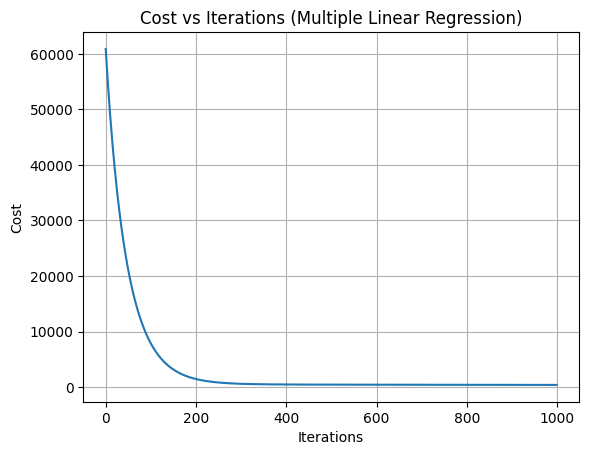

In [22]:
slope = np.zeros(X_norm.shape[1])
b_init = 0
alpha = 0.01
iterations = 1000

w_final, b_final, cost_history = gradient_descent(
    X_norm, y_train, slope, b_init, alpha, iterations
)

print("Final weights:", w_final)
print("Final bias:", b_final)

plt.plot(range(iterations), cost_history)
plt.title("Cost vs Iterations (Multiple Linear Regression)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


Plot the graph relation

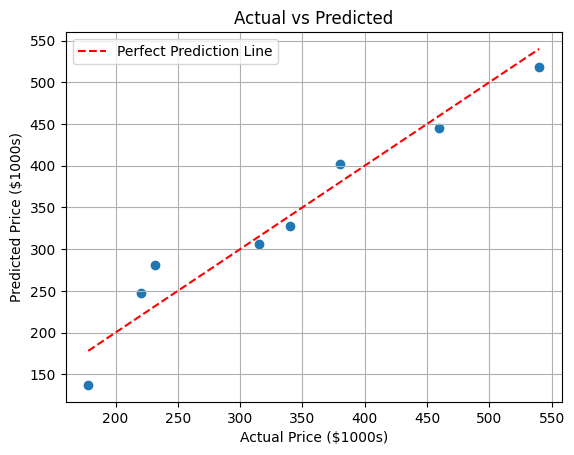

In [23]:
predictions = compute_model_output(X_norm, w_final, b_final)

plt.scatter(y_train, predictions)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Price ($1000s)")
plt.ylabel("Predicted Price ($1000s)")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()



Testing with sample example

In [24]:
def predict(x_test):
    x_norm = (x_test - mu) / sigma
    return np.dot(x_norm, w_final) + b_final

x_test = np.array([1200, 3, 1, 25])
predicted_price = predict(x_test)
print(f"Predicted price for house {x_test}: ${predicted_price:.0f} thousand")


Predicted price for house [1200    3    1   25]: $238 thousand
